In [29]:
import tensorflow as tf
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import os
from IPython import display
import time

1. Load and prepare the dataset

In [30]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [31]:
train_images.shape

(60000, 28, 28)

In [32]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

In [33]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [34]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

2. Create the model

In [66]:
def make_generator_model_0():
  """
  Using DNN to generate images
  Input: random vector, shape = (100,)
  Output: image matrix, shape = (None,28,28,1), range = [-1, 1]
  """
  model = tf.keras.Sequential()
  model.add(layers.Dense(128, input_shape=(100,)))
  model.add(layers.Activation('relu'))

  model.add(layers.Dense(784))
  model.add(layers.Activation('tanh'))

  model.add(layers.Reshape((28, 28, 1)))
  assert model.output_shape == (None, 28, 28, 1)

  return model

In [67]:
def make_discriminator_model_0():
  """
  Input: image matrix, shape = (28,28,1)
  Output: softmax indicating True/False
  """
  model = tf.keras.Sequential()

  model.add(layers.Flatten())

  model.add(layers.Dense(128, activation='relu'))

  model.add(layers.Dense(1, activation = 'sigmoid'))

  return model

In [68]:
generator_0 = make_generator_model_0()
discriminator_0 = make_discriminator_model_0()

In [35]:
def make_generator_model_1():
  """
  Using DNN to generate images
  Input: random vector, shape = (100,)
  Output: image matrix, shape = (None,28,28,1), range = [-1, 1]
  """
  model = tf.keras.Sequential()
  model.add(layers.Dense(128, input_shape=(100,)))
  model.add(layers.Activation('relu'))

  model.add(layers.Dense(784))
  model.add(layers.Activation('tanh'))

  model.add(layers.Reshape((28, 28, 1)))
  assert model.output_shape == (None, 28, 28, 1)

  return model

In [36]:
def make_discriminator_model_1():
  """
  Input: image matrix, shape = (28,28,1)
  Output: softmax indicating True/False
  """
  model = tf.keras.Sequential()

  model.add(layers.Flatten())

  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(1))
  model.add(layers.Activation('sigmoid'))


  return model

In [37]:
generator_1 = make_generator_model_1()
discriminator_1 = make_discriminator_model_1()

In [38]:
def make_generator_model_2():
  """
  Using CNN to generate images
  Input: random vector, shape = (100,)
  Output: image matrix, shape = (None,28,28,1)
  """
  model = tf.keras.Sequential()
  model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Reshape((7, 7, 256)))

  model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))


  return model

In [39]:
def make_discriminator_model_2():
  """
  Input: image matrix, shape = (28,28,1)
  Output: softmax indicating True/False
  """

  model = tf.keras.Sequential()
  model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                    input_shape=[28, 28, 1]))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))

  model.add(layers.Flatten())
  model.add(layers.Dense(1))
  model.add(layers.Activation('sigmoid'))



  return model

In [40]:
make_generator_model_2().summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 12544)             1254400   
_________________________________________________________________
batch_normalization_12 (Batc (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 12544)             0         
_________________________________________________________________
reshape_6 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose_12 (Conv2DT (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_13 (Batc (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 7, 7, 128)       

In [41]:
generator_2 = make_generator_model_2()
discriminator_2 = make_discriminator_model_2()


In [42]:
def make_generator_model_3():
  """
  Using CNN to generate images
  Input: random vector, shape = (100,)
  Output: image matrix, shape = (None,28,28,1)
  """
  model = tf.keras.Sequential()

  model.add(layers.Dense(2*2*256, input_shape=(100,)))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Reshape((2, 2, 256)))

  model.add(layers.Conv2DTranspose(128, (3, 3), strides=(1, 1), padding='same'))
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same'))
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2DTranspose(1, (3, 3), strides=(7, 7), padding='same', activation='tanh'))

  return model

In [43]:
make_generator_model_3().summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1024)              103424    
_________________________________________________________________
batch_normalization_18 (Batc (None, 1024)              4096      
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
reshape_8 (Reshape)          (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_transpose_18 (Conv2DT (None, 2, 2, 128)         295040    
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 2, 2, 128)         0         
_________________________________________________________________
conv2d_transpose_19 (Conv2DT (None, 4, 4, 64)        

In [44]:
def make_discriminator_model_3():
  """
  Input: image matrix, shape = (28,28,1)
  Output: softmax indicating True/False
  """
  model = tf.keras.Sequential()

  model.add(layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation = 'relu',
                                    input_shape=[28, 28, 1]))
  model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2, padding='same'))
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation = 'relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2, padding='same'))
  model.add(layers.Dropout(0.3))

  model.add(layers.Flatten())
  model.add(layers.Activation('sigmoid'))


  return model

In [45]:
make_discriminator_model_3().summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 256)             

In [46]:
generator_3 = make_generator_model_3()
discriminator_3 = make_discriminator_model_3()


3. Define loss and optimizer

In [47]:
def generator_loss(fake_output):
    return -tf.reduce_mean(tf.math.log(fake_output))

In [48]:
def discriminator_loss(real_output, fake_output):
    total_loss = -tf.reduce_mean(tf.math.log(real_output) + tf.math.log(1. - fake_output))
    return total_loss

In [49]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [50]:
# save checkpoint

def save_checkpoint(checkpoint_dir, generator, discriminator):
  checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
  checkpoint = tf.train.Checkpoint(generator=generator,
                                  discriminator=discriminator)
  return checkpoint_prefix, checkpoint

4. Define the training loop

In [51]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [57]:
def train_step(images, generator, discriminator):
    noise = tf.random.normal([images.shape[0], noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss



In [58]:
# def train_step(images, generator, discriminator, cnt, k):

#     noise = tf.random.normal([BATCH_SIZE, noise_dim])

#     with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
#       generated_images = generator(noise, training=True)

#       real_output = discriminator(images, training=True)
#       fake_output = discriminator(generated_images, training=True)

#       gen_loss = generator_loss(fake_output)
#       disc_loss = discriminator_loss(real_output, fake_output)

#     if (cnt+1)%(k+1) == 0:
#       gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
#       generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

#     else:
#       gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
#       discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

#     return gen_loss, disc_loss

In [59]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [60]:
def train(dataset, epochs, generator, discriminator, checkpoint_dir):

  g_loss_list = []
  d_loss_list = []

  checkpoint_prefix, checkpoint = save_checkpoint(checkpoint_dir, generator, discriminator)

  for epoch in range(epochs):
    start = time.time()
    g_loss = 0
    d_loss = 0

    for image_batch in dataset:
      g, d = train_step(image_batch, generator, discriminator)
      g_loss += g
      d_loss += d

    g_loss_list.append(g_loss)
    d_loss_list.append(d_loss)

    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)
    
    print('Time for epoch {} is {} sec, generation loss: {}, discrimination loss: {}'.format(epoch + 1, time.time()-start, g_loss, d_loss))

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)


  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)
  
  return g_loss_list, d_loss_list
  



5. Train the model

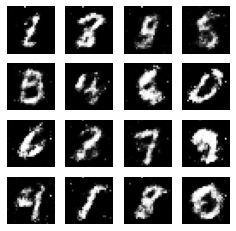

([<tf.Tensor: shape=(), dtype=float32, numpy=472.856>,
  <tf.Tensor: shape=(), dtype=float32, numpy=663.87354>,
  <tf.Tensor: shape=(), dtype=float32, numpy=507.89902>,
  <tf.Tensor: shape=(), dtype=float32, numpy=367.95468>,
  <tf.Tensor: shape=(), dtype=float32, numpy=293.18045>,
  <tf.Tensor: shape=(), dtype=float32, numpy=277.90933>,
  <tf.Tensor: shape=(), dtype=float32, numpy=270.7851>,
  <tf.Tensor: shape=(), dtype=float32, numpy=273.6221>,
  <tf.Tensor: shape=(), dtype=float32, numpy=289.25186>,
  <tf.Tensor: shape=(), dtype=float32, numpy=316.71637>,
  <tf.Tensor: shape=(), dtype=float32, numpy=328.44135>,
  <tf.Tensor: shape=(), dtype=float32, numpy=337.23004>,
  <tf.Tensor: shape=(), dtype=float32, numpy=340.78067>,
  <tf.Tensor: shape=(), dtype=float32, numpy=369.72086>,
  <tf.Tensor: shape=(), dtype=float32, numpy=369.93912>,
  <tf.Tensor: shape=(), dtype=float32, numpy=383.57816>,
  <tf.Tensor: shape=(), dtype=float32, numpy=399.25223>,
  <tf.Tensor: shape=(), dtype=float

In [69]:
train(train_dataset, 1000, generator_0, discriminator_0, './training_checkpoints_0')

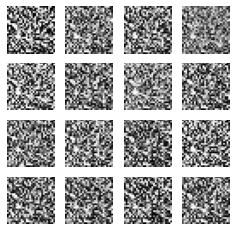

Time for epoch 739 is 8.85186767578125 sec, generation loss: 162.90072631835938, discrimination loss: 325.77392578125


KeyboardInterrupt: ignored

In [64]:
train(train_dataset, 1000, generator_1, discriminator_1, './training_checkpoints_1')

We find that in this model, the discriminator loss decreases while generator loss increases. The generated images might look more clear if we train more epoches.

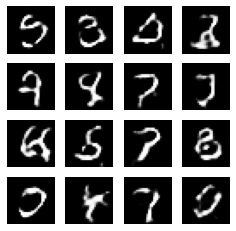

Time for epoch 35 is 16.590556621551514 sec, generation loss: 246.6483154296875, discrimination loss: 281.0121765136719


KeyboardInterrupt: ignored

In [63]:
train(train_dataset, EPOCHS, generator_2, discriminator_2, './training_checkpoints_2')

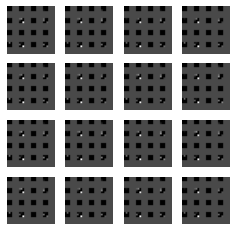

Time for epoch 31 is 7.3485283851623535 sec, generation loss: 162.8791046142578, discrimination loss: 211.83192443847656


KeyboardInterrupt: ignored

In [65]:
train(train_dataset, EPOCHS, generator_3, discriminator_3, './training_checkpoints_3')

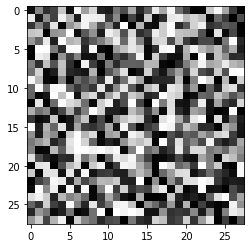

In [70]:
noise = tf.random.normal([1, 100])

plt.imshow(generator_1(noise, training=False)[0, :, :, 0], cmap='gray')

In [ ]:
plt.imshow(generator_2(noise, training=False)[0, :, :, 0], cmap='gray')

In [ ]:
plt.imshow(generator_3(noise, training=False)[0, :, :, 0], cmap='gray')